# COMP472- Assignment 2

In [1]:
#-------------------------------------------------------
#Assignment 2
#Written by Greta Avetisian
#For COMP 472 Section KX –Summer 2020
#--------------------------------------------------------

In [2]:
#Importing the libraries we're restricted to use.
import numpy as np
import pandas as pd
import sklearn
import nltk
import matplotlib.pyplot as plt
import math
import sys

import string #part of the standard library, so teacher allowed us to use it

## 1.1 Task 1: Exract the Data and Build the Model

In [3]:
#Reading the whole 'Hacker News' dataset
HackerNews_df= pd.read_csv("./Provided_docs/Demo/Dhns_2018_2019.csv").iloc[:,1:] #First columnn is unnecessary (df index will already have the same values)
#Printing the df to see its overall composition 
HackerNews_df

,Object ID,Title,Post Type,Author,Created At,URL,Points,Number of Comments,Year
0,16572152,A Year in Space and Now He Has Different DNA T...,story,oedmarap,2018-03-12 22:11:01,https://www.livescience.com/62000-scott-kelly-...,2,0,2018
1,16588664,Study: identical twins' DNA differ after one s...,story,anigbrowl,2018-03-14 21:54:59,https://www.nasa.gov/feature/nasa-twins-study-...,3,0,2018
2,16630033,DNA Tests: Should Everyone Get One? 🇺🇸🇺🇸🇺🇸💪,story,rbanffy,2018-03-20 16:27:03,http://fortune.com/2018/03/19/dna-testing-colo...,1,0,2018
3,16681334,How DNA can be used to store computer data,story,jonbaer,2018-03-26 18:42:18,http://www.bbc.com/news/av/science-environment...,1,1,2018
4,16855747,Generate identicons for DNA sequences with Python,story,pypypypypypy,2018-04-17 05:31:57,https://github.com/Edinburgh-Genome-Foundry/se...,2,0,2018
...,...,...,...,...,...,...,...,...,...
57,20074118,Ask_HN: EnTT C++ ECS and Reactive Systems – Fe...,ask_hn,skypjack,2019-06-02 07:47:04,https://www.reddit.com/r/gamedev/comments/bvr3...,1,0,2018
58,19122966,Ask_HN: What real impact does AI/ML projects h...,ask_hn,vs2370,2019-02-09 16:09:53,NaN,2,1,2018
59,18987985,Coming Soon to a Police Station Near You: The ...,story,SQL2219,2019-01-24 12:15:45,https://www.nytimes.com/2019/01/21/science/dna...,98,58,2018
60,19290191,New genetic genealogy services that test DNA f...,story,Osiris30,2019-03-02 17:50:22,https://www.theatlantic.com/article/583636/,2,0,2018


In [4]:
HackerNews_df.dtypes

Object ID              int64
Title                 object
Post Type             object
Author                object
Created At            object
URL                   object
Points                 int64
Number of Comments     int64
Year                   int64
dtype: object

In [5]:
#Converting the 'Created At' column into a date type
HackerNews_df['Created At'] = pd.to_datetime(HackerNews_df['Created At'])
HackerNews_df.dtypes

Object ID                      int64
Title                         object
Post Type                     object
Author                        object
Created At            datetime64[ns]
URL                           object
Points                         int64
Number of Comments             int64
Year                           int64
dtype: object

In [6]:
#Subsetting the whole 'Hacker News' dataset to get a training set
#The condition for the training set is that the 'Created At' column must be in 2018.
training_df = HackerNews_df[HackerNews_df['Created At'].dt.year == 2018]
training_df

,Object ID,Title,Post Type,Author,Created At,URL,Points,Number of Comments,Year
0,16572152,A Year in Space and Now He Has Different DNA T...,story,oedmarap,2018-03-12 22:11:01,https://www.livescience.com/62000-scott-kelly-...,2,0,2018
1,16588664,Study: identical twins' DNA differ after one s...,story,anigbrowl,2018-03-14 21:54:59,https://www.nasa.gov/feature/nasa-twins-study-...,3,0,2018
2,16630033,DNA Tests: Should Everyone Get One? 🇺🇸🇺🇸🇺🇸💪,story,rbanffy,2018-03-20 16:27:03,http://fortune.com/2018/03/19/dna-testing-colo...,1,0,2018
3,16681334,How DNA can be used to store computer data,story,jonbaer,2018-03-26 18:42:18,http://www.bbc.com/news/av/science-environment...,1,1,2018
4,16855747,Generate identicons for DNA sequences with Python,story,pypypypypypy,2018-04-17 05:31:57,https://github.com/Edinburgh-Genome-Foundry/se...,2,0,2018
5,16908843,Scientists find human DNA that looks like a tw...,story,adventured,2018-04-24 00:38:11,http://www.latimes.com/science/sciencenow/la-s...,3,0,2018
6,17170623,Show_HN: The Epic Project to Record the DNA of...,show_hn,laurex,2018-05-28 04:39:11,https://singularityhub.com/2018/05/27/the-epic...,2,0,2018
7,17331839,"Using Harpoon-Like Appendages, Bacteria ‘Fish’...",story,dnetesn,2018-06-17 11:00:24,https://www.nytimes.com/2018/06/14/science/bac...,52,4,2018
8,17481157,Scientists have created an AI inside a test tu...,story,laurex,2018-07-07 23:04:51,http://www.dailymail.co.uk/sciencetech/article...,1,0,2018
9,17492553,ARTIFICIAL NEURAL NETWORK MADE OUT OF DNA,story,doener,2018-07-09 18:58:41,https://www.nature.com/articles/s41586-018-028...,2,0,2018


In [7]:
training_df['Post Type'].unique()

array(['story', 'show_hn', 'ask_hn', 'poll'], dtype=object)

In [8]:
#Subsetting the whole 'Hacker News' dataset to get a testing set (for later).
#The condition for the testing set is that the 'Created At' column must be in 2019.
testing_df = HackerNews_df[HackerNews_df['Created At'].dt.year == 2019]
testing_df

,Object ID,Title,Post Type,Author,Created At,URL,Points,Number of Comments,Year
52,18846686,‘Flyover Tech’ Is All the Rage at J.P. Morgan ...,poll,jihadjihad,2019-01-07 16:39:27,https://observer.com/2019/01/flyover-tech-jp-m...,1,0,2018
53,18866413,Show_HN: London is top European city for tech ...,show_hn,mikhailfranco,2019-01-09 17:05:06,https://www.telegraph.co.uk/technology/2019/01...,13,7,2018
54,18985338,Sequoia launches seed investment program in So...,poll,williswee,2019-01-24 01:59:23,https://www.techinasia.com/sequoia-launches-se...,1,0,2018
55,19361816,Show HN: Unmind scores £3M investment for its ...,show_hn,cl42,2019-03-11 19:05:45,https://techcrunch.com/2019/03/11/unmind,1,0,2018
56,19989126,Show HN: Tesla may need investment from compan...,show_hn,bdcravens,2019-05-23 06:42:36,https://www.businessinsider.com/tesla-may-need...,1,1,2018
57,20074118,Ask_HN: EnTT C++ ECS and Reactive Systems – Fe...,ask_hn,skypjack,2019-06-02 07:47:04,https://www.reddit.com/r/gamedev/comments/bvr3...,1,0,2018
58,19122966,Ask_HN: What real impact does AI/ML projects h...,ask_hn,vs2370,2019-02-09 16:09:53,NaN,2,1,2018
59,18987985,Coming Soon to a Police Station Near You: The ...,story,SQL2219,2019-01-24 12:15:45,https://www.nytimes.com/2019/01/21/science/dna...,98,58,2018
60,19290191,New genetic genealogy services that test DNA f...,story,Osiris30,2019-03-02 17:50:22,https://www.theatlantic.com/article/583636/,2,0,2018
61,19774455,Project Dustbunny: Is Shakespeare’s DNA Hiding...,story,infodocket,2019-04-28 23:19:15,https://www.washingtonian.com/2019/04/25/shake...,1,0,2018


In [9]:
def modelToText(model, modelTextFileName):
    """
    This function will take in the model and reformat its contents into a text file as the following format:
    1. A line counter i,followed by 2 spaces.
    2. The word wi,followed by 2 spaces.
    3. The frequency of wi in the class story, followed by 2 spaces.
    4. The smoothed conditional probabilityof wi in story–P(wi|story),followed by 2 spaces.
    5. The frequency of wi in the class ask_hn, followed by 2 spaces.
    6. The smoothed conditional probability of wi in ask_hn–P(wi|ask_hn),followed by 2 spaces.
    7. The frequency of wi in the class show_hn, followed by 2 spaces.
    8. The smoothed conditional probability of wi in show_hn–P(wi|show_hn),followed by 2 spaces.
    9. The frequency of wi in the class poll, followed by 2 spaces.
    10. The smoothed  conditional  probability of wi in poll–P(wi|poll),followed  by a  carriage return
    
    model: Dataframe containing each word in the vocabulary, its frequency and its conditional probability for each possible
        Post Type.
    modelTextFileName: File name you want for the generated text file that will be returned by this function.
    """
    
    #Sorting the passed in model in alphabetical order of the 'Vocabulary' column
    modelUpdated = model.sort_values(by='Vocabulary')
    modelUpdated = modelUpdated.reset_index()
    
    #Creating our file
    file_model = open(modelTextFileName,'w', encoding="utf-8")
    
    #Writing to our file
    for i in range(len(modelUpdated)):
        file_model.write(
            #1. A line counter i,followed by 2 spaces.
            str(i+1) +'  ' +
            #2. The word wi,followed by 2 spaces.
            str(modelUpdated.loc[i,'Vocabulary']) +'  ' +
            #3. The frequency of wi in the class story, followed by 2 spaces.
            str(modelUpdated.loc[i,'Frequency in Story']) +'  ' +
            #4. The smoothed conditional probabilityof wi in story–P(wi|story),followed by 2 spaces.
            str(modelUpdated.loc[i,'Pwi|story']) +'  ' +
            #5. The frequency of wi in the class ask_hn, followed by 2 spaces.
            str(modelUpdated.loc[i,'Frequency in Ask_hn']) +'  ' +
            #6. The smoothed conditional probability of wi in ask_hn–P(wi|ask_hn),followed by 2 spaces
            str(modelUpdated.loc[i,'Pwi|ask_hn']) +'  ' +
            #7. The frequency of wi in the class show_hn, followed by 2 spaces.
            str(modelUpdated.loc[i,'Frequency in Show_hn']) +'  ' +
            #8. The smoothed conditional probability of wi in show_hn–P(wi|show_hn),followed by 2 spaces
            str(modelUpdated.loc[i,'Pwi|show_hn']) +'  ' +
            #9. The frequency of wi in the class poll, followed by 2 spaces.
            str(modelUpdated.loc[i,'Frequency in Poll']) +'  ' +
            #10.The smoothed  conditional  probability of wi in poll–P(wi|poll),followed  by a  carriage return.
            str(modelUpdated.loc[i,'Pwi|poll']) + '\r'
        )
    
    #Closing the file
    file_model.close()
    
    #To examine the file, go see the directory this notebook is located in and you will see it has been added.

In [10]:
def vocabToText(model, vocabTextFileName):
    """
    This function will take in the model from which it will read the vocabulary and create the corresponding vocabulary text
    file.
    
    model: Dataframe containing each word in the vocabulary, its frequency and its conditional probability for each Post Type.
    vocabTextFileName: File name you want for the generated text file that will be returned by this function.
    """
    
    #Sorting the passed in model in alphabetical order of the 'Vocabulary' column
    modelUpdated = model.sort_values(by='Vocabulary')
    modelUpdated = modelUpdated.reset_index()
    
    #Creating our file
    file_model = open(str(vocabTextFileName),'w', encoding="utf-8")
    
    #Writing to our file
    for i in range(len(modelUpdated)):
        file_model.write(
            #Printing all the words in our vocabulary
            str(modelUpdated.loc[i,'Vocabulary']) + '\r'
        )
    
    #Closing the file
    file_model.close()
    
    #To examine the generated file, go see the directory this notebook is located in and you will see it has been added.

In [11]:
def removedVocabToText(removeList, removeTextFileName):
    """
    This function will take in a list of removed words from the vocabulary and create the corresponding removed words text
    file.
   
    removeList: List of words we removed from the vocabulary.
    removeTextFileName: File name you want for the generated text file that will be returned by this function.

    """
    
    #Sorting the passed in model in alphabetical order of the 'Vocabulary' column
    removeUpdated = sorted(removeList)

    #Creating our file
    file_removed = open(str(removeTextFileName),'w', encoding="utf-8")
    
    #Writing to our file
    for word in removeUpdated:
        file_removed.write(word+'\n')
    
    #Closing the file
    file_removed.close()
    
    #To examine the generated file, go see the directory this notebook is located in and you will see it has been added.

In [12]:
def createVocabAndModel(trainingSet, modelTextFileName, vocabTextFileName, removeTextFileName, smoothing = 0.5,
                        stopwordList = None, wordLengthFiltering = False, frequency = None, top = None):
    """
    This function will take in the training dataset from which it will create the vocabulary based on the 'Title' column
    and possibly be filtered either by use of stopwords, word length or infrequent frequency (frequency or top %).
    This function will also generate the resulting model, vocabulary and removed_words text files with the picked names.
    
    trainingSet: Dataframe containing the data from which we will create the Machine Learning model.
    modelTextFileName: File name you want for the model text file that will be returned.
    vocabTextFileName: File name you want for the vocabulary text file that will be returned.
    removeTextFileName: File name you want for the removed words text file that will be returned.
    smoothing: Value used in conditional probability to avoid zero probability
    stopwordList: List of words to remove if present in the vocabulary.
    
    """
    
    #Initializing variables we will need
    vocabulary, removedWords = ([] for i in range(2)) 
    trainSet = trainingSet.copy() #Deep copy to avoid having a value try being set on a copy of a slice of the trainingSet
    
    #Adding a new column for the word tokenized lowercase 'Title'
    trainSet['Tokenized Title'] = trainSet['Title'].str.lower().apply(nltk.word_tokenize)
    
    #Filtering words based on specific conditions if enabled (stopwords and word length are handled here).
    if(stopwordList != None or wordLengthFiltering):
        print('Filtered by stopwords or wordlenght')
        if(stopwordList != None):
            print('stopword filt')
            #Removing the words that are part of the stopword list  from 
            for i in np.arange(len(trainSet)): 
                stopwordFreeTitle = list()
                for j in trainSet.loc[i,'Tokenized Title']:
                    if(j not in stopwordList):
                        stopwordFreeTitle.append(j)
                    else:
                        removedWords.append(j)
                trainSet.at[i,'Tokenized Title'] = stopwordFreeTitle
        elif(wordLengthFiltering):
            #Removing the words that don't respect the length constraints
            print('length filt')            
            for i in np.arange(len(trainSet)): 
                stopwordFreeTitle = list()
                for j in trainSet.loc[i,'Tokenized Title']:
                    if(len(j) >2 and len(j) < 9) :
                        stopwordFreeTitle.append(j)
                    else:
                        removedWords.append(j)
                trainSet.at[i,'Tokenized Title'] = stopwordFreeTitle
    
    #Iterating over the 'Tokenized Title' column and appending its contents to allWordsGeneral and the respective
    # allWords_POST_TYPE where POST_TYPE is either 'story','ask_hn','show_hn','poll'
    allWordsGeneral, allWordsStory, allWordsAsk_hn, allWordsShow_hn, allWordsPoll = ([] for i in range(5)) 
    for i in range(len(trainSet)):
        #Adding the contents of the new column into the corresponding list for each post type
        allWordsGeneral += trainSet.loc[i,'Tokenized Title']
        postTypeRow = trainSet.loc[i,'Post Type']
        if postTypeRow == 'story':
            allWordsStory += trainSet.loc[i,'Tokenized Title']
        elif postTypeRow == 'ask_hn':
            allWordsAsk_hn += trainSet.loc[i,'Tokenized Title']
        elif postTypeRow == 'show_hn':
            allWordsShow_hn += trainSet.loc[i,'Tokenized Title']
        elif postTypeRow == 'poll':
            allWordsPoll += trainSet.loc[i,'Tokenized Title']

    #Creating the vocabulary and empty remove_text list by creating a set from allWordsGeneral 
    vocabulary = list(set(allWordsGeneral))
    removedWords = list(set(removedWords))
    
    #Creating the corresponding model
    #--Starting by adding our vocabulary
    model = pd.DataFrame(vocabulary, columns = ['Vocabulary'])
    
    #--Getting the frequency and conditional probability for each Post Type of each word
    #----Initializing needed variables
    countWords = list()
    frStory,frAsk_hn, frShow_hn,frPoll  = ([] for i in range(4))  #fr is for frequency
    cpStory, cpAsk_hn,cpShow_hn, cpPoll = ([] for i in range(4)) #cp is for conditional probability
    
    #----Initializing denominator for Naïve Bayes classifier
    lenAWSPlusVoc = (len(allWordsStory)+len(vocabulary)* smoothing)
    lenAWAPlusVoc = (len(allWordsAsk_hn)+len(vocabulary)* smoothing)
    lenAWSHPlusVoc = (len(allWordsShow_hn)+len(vocabulary)* smoothing)
    lenAWPPlusVoc = (len(allWordsPoll)+len(vocabulary)* smoothing)
    
    #----Determining the Frequency of each word in our vocabulary for each Post Type
    for i in range(len(model)):
        countWords.append(allWordsGeneral.count(model.at[i,'Vocabulary']))
        frStory.append(allWordsStory.count(model.at[i,'Vocabulary']))
        frAsk_hn.append(allWordsAsk_hn.count(model.at[i,'Vocabulary']))
        frShow_hn.append(allWordsShow_hn.count(model.at[i,'Vocabulary']))
        frPoll.append(allWordsPoll.count(model.at[i,'Vocabulary']))
    
    model['Frequency in General'] = countWords #This isn't needed, but it helps verify that the table is correct
    model['Frequency in Story'] = frStory
    model['Frequency in Ask_hn'] = frAsk_hn
    model['Frequency in Show_hn'] = frShow_hn
    model['Frequency in Poll'] = frPoll
    
    #----Determining the Conditional Probability of each word in our vocabulary for each Post Type
    for i in range(len(model)):
        #Post Type: Story
        condProb = (model.at[i,'Frequency in Story']+smoothing)/lenAWSPlusVoc
        cpStory.append(condProb)
        
        #Post Type: Ask_hn
        condProb = (model.at[i,'Frequency in Ask_hn']+smoothing)/lenAWAPlusVoc
        cpAsk_hn.append(condProb)
        
        #Post Type: Show_hn
        condProb = (model.at[i,'Frequency in Show_hn']+smoothing)/lenAWSHPlusVoc
        cpShow_hn.append(condProb)

        #Post Type: Poll
        condProb = (model.at[i,'Frequency in Poll']+smoothing)/lenAWPPlusVoc
        cpPoll.append(condProb)
        
    model['Pwi|story'] = cpStory
    model['Pwi|ask_hn'] = cpAsk_hn
    model['Pwi|show_hn'] = cpShow_hn
    model['Pwi|poll'] = cpPoll
    
    #Filtering words based on specific conditions if enabled (frequency or top % are handled here).
    if(frequency != None and top == None):
        if(frequency ==1):
            #Creating a new remove_df where we find all words with frequency 1
            remove_df = model[model['Frequency in General']==1]
            #Append these values to the removed list
            removedWords = list(set(remove_df['Vocabulary'].tolist())) 
            #Remove the rows with removed words from the original model
            model.drop(remove_df.index, inplace = True) 
            model = model.reset_index()
            #Redefining the vocabulary
            vocabulary = list(set(model['Vocabulary'].tolist())) 
        elif(frequency != 1 and frequency != None):
            #Creating a new remove_df where we find all words with frequency 1
            remove_df = model[model['Frequency in General'] < (frequency+1)]
            #Append these values to the removed list
            removedWords = list(set(remove_df['Vocabulary'].tolist())) 
            #Remove the rows with removed words from the original model
            model.drop(remove_df.index, inplace = True)
            model = model.reset_index()
            #Redefining the vocabulary
            vocabulary = list(set(model['Vocabulary'].tolist())) 
    elif(frequency == None and top != None):
        model = model.sort_values(by='Frequency in General', ascending = False)
        model = model.reset_index(drop = True)
        numRowsToRemove = math.ceil((top/100)*len(model))

        #Creating a new remove_df where we find all words that are to be removed from top
        remove_df = model[:numRowsToRemove]
        #Append these values to the removed list
        removedWords = list(set(remove_df['Vocabulary'].tolist())) 
        #Remove the rows with removed words from the original model
        model.drop(remove_df.index, inplace = True)
        model = model.reset_index(drop = True)

    
    #Creating the model, vocabulary and removed words text files
    modelToText(model, modelTextFileName)
    vocabToText(model, vocabTextFileName)
    removedVocabToText(removedWords, removeTextFileName)
    
    return model


In [13]:
model = createVocabAndModel(training_df, 'model-2018.txt', 'vocabulary.txt', 'remove_word.txt')
model

,Vocabulary,Frequency in General,Frequency in Story,Frequency in Ask_hn,Frequency in Show_hn,Frequency in Poll,Pwi|story,Pwi|ask_hn,Pwi|show_hn,Pwi|poll
0,now,1,1,0,0,0,0.003836,0.001582,0.001534,0.001825
1,guy,1,1,0,0,0,0.003836,0.001582,0.001534,0.001825
2,preferred,1,0,1,0,0,0.001279,0.004747,0.001534,0.001825
3,fulfilling,1,0,0,1,0,0.001279,0.001582,0.004601,0.001825
4,that,1,1,0,0,0,0.003836,0.001582,0.001534,0.001825
...,...,...,...,...,...,...,...,...,...,...
341,darico,1,0,0,1,0,0.001279,0.001582,0.004601,0.001825
342,twin,1,1,0,0,0,0.003836,0.001582,0.001534,0.001825
343,n't,1,0,0,1,0,0.001279,0.001582,0.004601,0.001825
344,to,15,5,3,6,1,0.014066,0.011076,0.019939,0.005474


## 1.2 Task 2: Use ML Classifier to test dataset

In [14]:
def classifiedToText(classifiedTestSet, classifiedTextFileName):
    """
    This function will take in the classifiedTestSet and reformat its contents into a text file as the following format:
    1. a line counter, followed by 2 spaces
    2. the name of the test post Title, followed by 2 spaces
    3. the classification as given by your classifier (the label story, ask-hn, show-hnor poll), followed by 2 spaces
    4. the score of the class story as given by your classifier, followed by 2 spaces
    5. the score of the class ask-hn as given by your classifier, followed by 2 spaces
    6. the score of the class show-hn as given by your classifier, followed by 2 spaces
    7. the score of the class pollas given by your classifier, followed by 2 spaces
    8. the correct classification of post, followed by 2 spaces
    9. the label right or wrong (depending on the case), followed by a carriage return.
    
    clasifiedTestSet: Dataframe where Naive Bays Classifier was applied to classify the likely Post Type class of the test data
    classifiedTextFileName: File name you want for the generated text file that will be returned by this function.

    """
    #Creating our file
    file_classified = open(str(classifiedTextFileName),'w', encoding="utf-8")
    
    #Writing to our file
    for i in range(len(classifiedTestSet)):
        file_classified.write(
            #1. A line counter i,followed by 2 spaces.
            str(i+1) +'  ' +
            #2. the name of the test post Title, followed by 2 spaces
            str(classifiedTestSet.loc[i,'Title']) +'  ' +
            #3. the classification as given by your classifier (the label story, ask-hn, show-hnor poll), followed by 2 spaces
            str(classifiedTestSet.loc[i,'Classified Post Type']) +'  ' +
            #4. the score of the class story as given by your classifier, followed by 2 spaces
            str(classifiedTestSet.loc[i,'Score Story']) +'  ' +
            #5. the score of the class ask-hn as given by your classifier, followed by 2 spaces
            str(classifiedTestSet.loc[i,'Score Ask_hn']) +'  ' +
            #6. the score of the class show-hn as given by your classifier, followed by 2 spaces
            str(classifiedTestSet.loc[i,'Score Show_hn']) +'  ' +
            #7. the score of the class poll as given by your classifier, followed by 2 spaces
            str(classifiedTestSet.loc[i,'Score Poll']) +'  ' +
            #8. the correct classification of post, followed by 2 spaces
            str(classifiedTestSet.loc[i,'Original Post Type']) +'  ' +
            #9. the label right or wrong (depending on the case), followed by a carriage return.
            str(classifiedTestSet.loc[i,'Right/Wrong']) + '\r'
        )
    
    #Closing the file
    file_classified.close()
    
    #To examine the file, go see the directory this notebook is located in and you will see it has been added.

In [15]:
def classifier(model, testSet, trainSet, classifiedTextFileName):
    """
    This function will use the previously determined model to classify the testing set we pass to it.
    It will also write the results into a text file with a name of your choosing.
    
    model: Dataframe we created in Task 1 which has the frequency and conditional probability for each post type.
    testSet: Dataframe containing the data we want to evaluate based off of the model(same format as the training set).
    trainSet: Dataframe containing the data from which we created the Machine Learning model.
    classifiedTextFileName: File name you want for the classification text file.
    """
    
    #Probabilities of each post type occuring (from the trainSet)
    PStory = len(trainSet[trainSet['Post Type'] == 'story'])/len(trainSet)
    PAsk_hn = len(trainSet[trainSet['Post Type'] == 'ask_hn'])/len(trainSet)
    PShow_hn = len(trainSet[trainSet['Post Type'] == 'show_hn'])/len(trainSet)
    PPoll = len(trainSet[trainSet['Post Type'] == 'poll'])/len(trainSet)
    
    #Getting our vocabulary
    vocabulary = list(model['Vocabulary'])
    
    #Repeating the tokenization process on the testing dataset, so the model can be applied for Naive Bayes Classifier
    classifiedTestSet = pd.DataFrame()
    classifiedTestSet[['Title','Original Post Type']] = testSet[['Title','Post Type']]
    classifiedTestSet['Tokenized Title'] = classifiedTestSet['Title'].str.lower().apply(nltk.word_tokenize)
    classifiedTestSet = classifiedTestSet.reset_index(drop = True) #Makes it easier to iterate through later.
    
    #For each row in the test set, add a score for each Post Type
    for i in np.arange(len(classifiedTestSet)): 
        #First, add the log of the probability of the corresponding post type
        classifiedTestSet.loc[i, 'Score Story'] = math.log10(PStory) if PStory != 0 else float('-inf')
        classifiedTestSet.loc[i, 'Score Ask_hn'] = math.log10(PAsk_hn) if PAsk_hn != 0 else float('-inf')  
        classifiedTestSet.loc[i, 'Score Show_hn'] = math.log10(PShow_hn) if PShow_hn != 0 else float('-inf') 
        classifiedTestSet.loc[i, 'Score Poll'] = math.log10(PPoll) if PPoll != 0 else float('-inf') 
        for j in classifiedTestSet.loc[i,'Tokenized Title']:
            #Check if the current word is part of the vocabulary. If not, ignore it.
            if(j in vocabulary):
                index = vocabulary.index(j)
                #Add the log of the conditional probability (given the post type) of the word to each possible score
                #Note: we're using log10 to avoid having arithemtic underflow
                classifiedTestSet.loc[i, 'Score Story'] = classifiedTestSet.loc[i, 'Score Story'] + math.log10(model.loc[index,'Pwi|story'])
                classifiedTestSet.loc[i, 'Score Ask_hn'] = classifiedTestSet.loc[i, 'Score Ask_hn'] + math.log10(model.loc[index,'Pwi|ask_hn']) 
                classifiedTestSet.loc[i, 'Score Show_hn'] = classifiedTestSet.loc[i, 'Score Show_hn'] + math.log10(model.loc[index,'Pwi|show_hn']) 
                classifiedTestSet.loc[i, 'Score Poll'] = classifiedTestSet.loc[i, 'Score Poll'] + math.log10(model.loc[index,'Pwi|poll'])
        
        #Computing the maximum score which will determine the most likely Post Type
        classifiedTestSet.loc[i,'Max Score'] = max(classifiedTestSet.loc[i, 'Score Story'],
                                                 classifiedTestSet.loc[i, 'Score Ask_hn'],
                                                 classifiedTestSet.loc[i, 'Score Show_hn'],
                                                 classifiedTestSet.loc[i, 'Score Poll'])
        
        #Storing the probable Post Type based on Max Score column in 'Classified Post Type'
        if(classifiedTestSet.loc[i,'Max Score'] == classifiedTestSet.loc[i, 'Score Story']):
            classifiedTestSet.loc[i,'Classified Post Type'] = 'story'
        elif(classifiedTestSet.loc[i,'Max Score'] == classifiedTestSet.loc[i, 'Score Ask_hn']):
            classifiedTestSet.loc[i,'Classified Post Type'] = 'ask_hn'                                    
        elif(classifiedTestSet.loc[i,'Max Score'] == classifiedTestSet.loc[i, 'Score Show_hn']):
            classifiedTestSet.loc[i,'Classified Post Type'] = 'show_hn'                                  
        elif(classifiedTestSet.loc[i,'Max Score'] == classifiedTestSet.loc[i, 'Score Poll']):
            classifiedTestSet.loc[i,'Classified Post Type'] = 'poll'
    
        #Adding the right/wrong column by comparing the classified post type and the actual post type
        if(classifiedTestSet.loc[i,'Original Post Type'] == classifiedTestSet.loc[i,'Classified Post Type']):
            classifiedTestSet.loc[i,'Right/Wrong'] = 'right'     
        else:
            classifiedTestSet.loc[i,'Right/Wrong'] = 'wrong'
        
    #Creating our classification result file
    classifiedToText(classifiedTestSet, classifiedTextFileName)
    
    return classifiedTestSet


In [16]:
classifiedTestSet = classifier(model,testing_df,training_df,'baseline-result.txt')
classifiedTestSet

,Title,Original Post Type,Tokenized Title,Score Story,Score Ask_hn,Score Show_hn,Score Poll,Max Score,Classified Post Type,Right/Wrong
0,‘Flyover Tech’ Is All the Rage at J.P. Morgan ...,poll,"[‘, flyover, tech, ’, is, all, the, rage, at, ...",-20.299960,-21.866467,-18.787473,-19.286399,-18.787473,show_hn,wrong
1,Show_HN: London is top European city for tech ...,show_hn,"[show_hn, :, london, is, top, european, city, ...",-15.321661,-13.912851,-11.922889,-14.650376,-11.922889,show_hn,right
2,Sequoia launches seed investment program in So...,poll,"[sequoia, launches, seed, investment, program,...",-9.757096,-10.663599,-9.292840,-10.017913,-9.292840,show_hn,wrong
3,Show HN: Unmind scores £3M investment for its ...,show_hn,"[show, hn, :, unmind, scores, £3m, investment,...",-15.798782,-13.067753,-13.320829,-15.604619,-13.067753,ask_hn,wrong
4,Show HN: Tesla may need investment from compan...,show_hn,"[show, hn, :, tesla, may, need, investment, fr...",-25.940245,-24.747742,-24.100698,-26.082620,-24.100698,show_hn,right
5,Ask_HN: EnTT C++ ECS and Reactive Systems – Fe...,ask_hn,"[ask_hn, :, entt, c++, ecs, and, reactive, sys...",-12.282326,-9.961207,-11.818758,-13.087687,-9.961207,ask_hn,right
6,Ask_HN: What real impact does AI/ML projects h...,ask_hn,"[ask_hn, :, what, real, impact, does, ai/ml, p...",-20.484825,-18.877463,-20.483350,-21.304029,-18.877463,ask_hn,right
7,Coming Soon to a Police Station Near You: The ...,story,"[coming, soon, to, a, police, station, near, y...",-16.951071,-20.100551,-17.716194,-19.395543,-16.951071,story,right
8,New genetic genealogy services that test DNA f...,story,"[new, genetic, genealogy, services, that, test...",-14.704361,-16.043185,-15.391974,-15.717323,-14.704361,story,right
9,Project Dustbunny: Is Shakespeare’s DNA Hiding...,story,"[project, dustbunny, :, is, shakespeare, ’, s,...",-27.544102,-30.750577,-26.634575,-29.396423,-26.634575,show_hn,wrong


In [17]:
#Getting a general idea of how many we have right/wrong right now
classifiedTestSet['Right/Wrong'].value_counts()

right    6
wrong    4
Name: Right/Wrong, dtype: int64

## 1.3 Task 3: Experiments with the classifier
### 1.3.1 Experiment 1: Stop-word Filtering

In [18]:
#Reading the list of stop words
file_handle = open("./Provided_docs/stopwords.txt",'r')
stopwords = file_handle.read()
stopwords = stopwords.split('\n')
file_handle.close()
stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'cc',
 'couldn',
 "couldn't",
 'd',
 'delivered-to',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'errors-to',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'in-reply-to',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 'its',
 "it's",
 'itself',
 'just',
 'list-archive',
 'list-help',
 'list-post',
 'list-subscribe',
 'list-unsubscribe',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'mime-version',
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't

In [19]:
#In the above list, we notice that concatenations are considered as one word
#However, when we apply word_tokenizer, it seperates them into 2 in our models
#Thus, I will apply word_tokenizer on this list as well so I can easily match them
#to what I end up having during the creation of my model 
stopwords = [nltk.word_tokenize(i) for i in stopwords]
#Need to flatten it to a single list
#tokenized_sents = tokenized_sents.flatten()
stopwords = [y for x in stopwords for y in x]
stopwords = list(set(stopwords))
sorted(stopwords)

["'d",
 "'ll",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'cc',
 'could',
 'couldn',
 'd',
 'delivered-to',
 'did',
 'didn',
 'do',
 'does',
 'doesn',
 'doing',
 'don',
 'down',
 'during',
 'each',
 'errors-to',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 'has',
 'hasn',
 'have',
 'haven',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'in-reply-to',
 'into',
 'is',
 'isn',
 'it',
 'its',
 'itself',
 'just',
 'list-archive',
 'list-help',
 'list-post',
 'list-subscribe',
 'list-unsubscribe',
 'll',
 'm',
 'ma',
 'me',
 'might',
 'mightn',
 'mime-version',
 'more',
 'most',
 'must',
 'mustn',
 'my',
 'myself',
 "n't",
 'need',
 'needn',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 

In [20]:
m1 = createVocabAndModel(trainingSet = training_df,
                         modelTextFileName = 'stopword-model.txt',
                         vocabTextFileName = 'stopword-vocabulary.txt',
                         removeTextFileName = 'stopword-remove_word.txt',
                         stopwordList = stopwords)
m1

Filtered by stopwords or wordlenght
stopword filt


,Vocabulary,Frequency in General,Frequency in Story,Frequency in Ask_hn,Frequency in Show_hn,Frequency in Poll,Pwi|story,Pwi|ask_hn,Pwi|show_hn,Pwi|poll
0,show_hn,7,0,0,7,0,0.001678,0.002016,0.028736,0.002252
1,480b,1,0,0,1,0,0.001678,0.002016,0.005747,0.002252
2,guy,1,1,0,0,0,0.005034,0.002016,0.001916,0.002252
3,8b,1,0,0,1,0,0.001678,0.002016,0.005747,0.002252
4,preferred,1,0,1,0,0,0.001678,0.006048,0.001916,0.002252
...,...,...,...,...,...,...,...,...,...,...
283,regulated,1,0,0,0,1,0.001678,0.002016,0.001916,0.006757
284,twin,1,1,0,0,0,0.005034,0.002016,0.001916,0.002252
285,ai,1,1,0,0,0,0.005034,0.002016,0.001916,0.002252
286,beta,1,0,1,0,0,0.001678,0.006048,0.001916,0.002252


In the cell above, we notice that the probabilities increase which makes sense since we remove words from our vocabulary.
The length of the table has also decreased which makes sense, because we're ignoring certain words.

In [21]:
c1 = classifier(m1, testing_df, training_df, 'stopword-result.txt')
c1

,Title,Original Post Type,Tokenized Title,Score Story,Score Ask_hn,Score Show_hn,Score Poll,Max Score,Classified Post Type,Right/Wrong
0,‘Flyover Tech’ Is All the Rage at J.P. Morgan ...,poll,"[‘, flyover, tech, ’, is, all, the, rage, at, ...",-9.908503,-10.941628,-9.274508,-10.351293,-9.274508,show_hn,wrong
1,Show_HN: London is top European city for tech ...,show_hn,"[show_hn, :, london, is, top, european, city, ...",-10.239497,-9.543688,-7.084176,-9.983316,-7.084176,show_hn,right
2,Sequoia launches seed investment program in So...,poll,"[sequoia, launches, seed, investment, program,...",-7.355106,-8.246146,-7.033959,-7.959182,-7.033959,show_hn,wrong
3,Show HN: Unmind scores £3M investment for its ...,show_hn,"[show, hn, :, unmind, scores, £3m, investment,...",-13.014743,-10.695101,-10.500817,-13.107820,-10.500817,show_hn,right
4,Show HN: Tesla may need investment from compan...,show_hn,"[show, hn, :, tesla, may, need, investment, fr...",-19.210148,-19.480516,-18.176707,-20.350999,-18.176707,show_hn,right
5,Ask_HN: EnTT C++ ECS and Reactive Systems – Fe...,ask_hn,"[ask_hn, :, entt, c++, ecs, and, reactive, sys...",-9.762375,-6.739548,-8.618202,-9.983316,-6.739548,ask_hn,right
6,Ask_HN: What real impact does AI/ML projects h...,ask_hn,"[ask_hn, :, what, real, impact, does, ai/ml, p...",-10.239497,-7.730774,-9.317172,-10.460437,-7.730774,ask_hn,right
7,Coming Soon to a Police Station Near You: The ...,story,"[coming, soon, to, a, police, station, near, y...",-8.078129,-10.020809,-8.840051,-9.983316,-8.078129,story,right
8,New genetic genealogy services that test DNA f...,story,"[new, genetic, genealogy, services, that, test...",-6.147980,-8.723267,-7.613742,-8.181031,-6.147980,story,right
9,Project Dustbunny: Is Shakespeare’s DNA Hiding...,story,"[project, dustbunny, :, is, shakespeare, ’, s,...",-15.227776,-17.408284,-15.339850,-17.448344,-15.227776,story,right


In [22]:
#Getting a general idea of how many we have right/wrong right now
c1['Right/Wrong'].value_counts()

right    8
wrong    2
Name: Right/Wrong, dtype: int64

We have improved from the baseline experiment, because stopwords usually represent words that don't add value to our model.

### 1.3.2 Experiment 2: Word Length Filtering

In [23]:
m2 = createVocabAndModel(trainingSet = training_df,
                         modelTextFileName = 'stopword-model.txt',
                         vocabTextFileName = 'stopword-vocabulary.txt',
                         removeTextFileName = 'stopword-remove_word.txt',
                         wordLengthFiltering = True
                        )
m2.sort_values(by = 'Vocabulary', ascending = True)

Filtered by stopwords or wordlenght
length filt


,Vocabulary,Frequency in General,Frequency in Story,Frequency in Ask_hn,Frequency in Show_hn,Frequency in Poll,Pwi|story,Pwi|ask_hn,Pwi|show_hn,Pwi|poll
79,16b,1,0,1,0,0,0.001866,0.007389,0.002392,0.002618
176,2018,2,1,0,0,1,0.005597,0.002463,0.002392,0.007853
205,2022,1,0,0,1,0,0.001866,0.002463,0.007177,0.002618
239,2373,1,0,0,1,0,0.001866,0.002463,0.007177,0.002618
1,480b,1,0,0,1,0,0.001866,0.002463,0.007177,0.002618
...,...,...,...,...,...,...,...,...,...,...
88,year,3,2,0,1,0,0.009328,0.002463,0.007177,0.002618
31,you,1,1,0,0,0,0.005597,0.002463,0.002392,0.002618
56,your,2,1,0,1,0,0.005597,0.002463,0.007177,0.002618
5,zero,1,0,0,1,0,0.001866,0.002463,0.007177,0.002618


The length constraints can potentially remove a significant amount of the vocabulary.

In [24]:
c2 = classifier(m2, testing_df, training_df, 'wordlength-result.txt')
c2

,Title,Original Post Type,Tokenized Title,Score Story,Score Ask_hn,Score Show_hn,Score Poll,Max Score,Classified Post Type,Right/Wrong
0,‘Flyover Tech’ Is All the Rage at J.P. Morgan ...,poll,"[‘, flyover, tech, ’, is, all, the, rage, at, ...",-7.472134,-8.462400,-6.591866,-6.553708,-6.553708,poll,right
1,Show_HN: London is top European city for tech ...,show_hn,"[show_hn, :, london, is, top, european, city, ...",-7.949255,-7.508158,-6.370017,-7.286102,-6.370017,show_hn,right
2,Sequoia launches seed investment program in So...,poll,"[sequoia, launches, seed, investment, program,...",-3.189896,-3.245348,-2.780877,-3.298067,-2.780877,show_hn,wrong
3,Show HN: Unmind scores £3M investment for its ...,show_hn,"[show, hn, :, unmind, scores, £3m, investment,...",-7.949255,-6.809188,-7.546108,-7.763223,-6.809188,ask_hn,wrong
4,Show HN: Tesla may need investment from compan...,show_hn,"[show, hn, :, tesla, may, need, investment, fr...",-15.659628,-15.111887,-14.932516,-15.731262,-14.932516,show_hn,right
5,Ask_HN: EnTT C++ ECS and Reactive Systems – Fe...,ask_hn,"[ask_hn, :, entt, c++, ecs, and, reactive, sys...",-6.848885,-6.026238,-7.801381,-8.462193,-6.026238,ask_hn,right
6,Ask_HN: What real impact does AI/ML projects h...,ask_hn,"[ask_hn, :, what, real, impact, does, ai/ml, p...",-12.307214,-11.611266,-13.265582,-13.626320,-11.611266,ask_hn,right
7,Coming Soon to a Police Station Near You: The ...,story,"[coming, soon, to, a, police, station, near, y...",-6.009736,-8.462400,-6.847138,-7.507951,-6.009736,story,right
8,New genetic genealogy services that test DNA f...,story,"[new, genetic, genealogy, services, that, test...",-13.720109,-14.890038,-14.233546,-14.777020,-13.720109,story,right
9,Project Dustbunny: Is Shakespeare’s DNA Hiding...,story,"[project, dustbunny, :, is, shakespeare, ’, s,...",-8.738901,-11.070926,-8.991193,-10.090014,-8.738901,story,right


In [25]:
#Getting a general idea of how many we have right/wrong right now
c2['Right/Wrong'].value_counts()

right    8
wrong    2
Name: Right/Wrong, dtype: int64

As we see, removing words based on length constraints doesn't necessarily improve the performance of the classifier.
(The reason I say not necessarily is because maybe all the words do respect the length constraints which won't remove any words from the vocabulary in consequence.Thus, we will be left with our original model.)

### 1.3.1 Experiment 3: Infrequent Word Filtering

In [26]:
#Creating all the models we need for step 3 with frequencies 1, 5, 10, 15 and 20
Fmodel1 = createVocabAndModel(trainingSet = training_df,
                         modelTextFileName = 'frequency-1-model.txt',
                         vocabTextFileName = 'frequency-1-vocabulary.txt',
                         removeTextFileName = 'frequency-1-remove_word.txt',
                         frequency = 1)
Fmodel5 = createVocabAndModel(trainingSet = training_df,
                         modelTextFileName = 'frequency-5-model.txt',
                         vocabTextFileName = 'frequency-5-vocabulary.txt',
                         removeTextFileName = 'frequency-5-remove_word.txt',
                         frequency = 5)
Fmodel10 = createVocabAndModel(trainingSet = training_df,
                         modelTextFileName = 'frequency-10-model.txt',
                         vocabTextFileName = 'frequency-10-vocabulary.txt',
                         removeTextFileName = 'frequency-10-remove_word.txt',
                         frequency = 10)
Fmodel15 = createVocabAndModel(trainingSet = training_df,
                         modelTextFileName = 'frequency-15-model.txt',
                         vocabTextFileName = 'frequency-15-vocabulary.txt',
                         removeTextFileName = 'frequency-15-remove_word.txt',
                         frequency = 15)
Fmodel20 = createVocabAndModel(trainingSet = training_df,
                         modelTextFileName = 'frequency-20-model.txt',
                         vocabTextFileName = 'frequency-20-vocabulary.txt',
                         removeTextFileName = 'frequency-20-remove_word.txt',
                         frequency = 20)

#Creating the corresponding classifier for each model above
CFmodel1 = classifier(Fmodel1, testing_df, training_df, 'frequency-1-result.txt')
CFmodel5 = classifier(Fmodel5, testing_df, training_df, 'frequency-5-result.txt')
CFmodel10 = classifier(Fmodel10, testing_df, training_df, 'frequency-10-result.txt')
CFmodel15 = classifier(Fmodel15, testing_df, training_df, 'frequency-15-result.txt')
CFmodel20 = classifier(Fmodel20, testing_df, training_df, 'frequency-20-result.txt')

In [27]:
#Creating all the models we need for step 3 with top 5%, 10%, 15%, 20% and 25%
Tmodel5 = createVocabAndModel(trainingSet = training_df,
                         modelTextFileName = 'Top-5%-model.txt',
                         vocabTextFileName = 'Top-5%-vocabulary.txt',
                         removeTextFileName = 'Top-5%-remove_word.txt',
                         top = 5)
Tmodel10 = createVocabAndModel(trainingSet = training_df,
                         modelTextFileName = 'Top-10%-model.txt',
                         vocabTextFileName = 'Top-10%-vocabulary.txt',
                         removeTextFileName = 'Top-10%-remove_word.txt',
                         top = 10)
Tmodel15 = createVocabAndModel(trainingSet = training_df,
                         modelTextFileName = 'Top-15%-model.txt',
                         vocabTextFileName = 'Top-15%--vocabulary.txt',
                         removeTextFileName = 'Top-15%-remove_word.txt',
                         top = 15)
Tmodel20 = createVocabAndModel(trainingSet = training_df,
                         modelTextFileName = 'Top-20%--model.txt',
                         vocabTextFileName = 'Top-20%-vocabulary.txt',
                         removeTextFileName = 'Top-20%-remove_word.txt',
                         top = 20)
Tmodel25 = createVocabAndModel(trainingSet = training_df,
                         modelTextFileName = 'Top-25%-model.txt',
                         vocabTextFileName = 'Top-25%-vocabulary.txt',
                         removeTextFileName = 'Top-25%-remove_word.txt',
                         top = 25)

#Creating the corresponding classifier for each model above
CTmodel5 = classifier(Tmodel5, testing_df, training_df, 'Top-5%-result.txt')
CTmodel10 = classifier(Tmodel10, testing_df, training_df, 'Top-10%-result.txt')
CTmodel15 = classifier(Tmodel15, testing_df, training_df, 'Top-15%-result.txt')
CTmodel20 = classifier(Tmodel20, testing_df, training_df, 'Top-20%--result.txt')
CTmodel25 = classifier(Tmodel25, testing_df, training_df, 'Top-25%-result.txt')

In [28]:
#Since we don't necesarrily have all post type represented equally, we must use Recall, Precision or F-Measure for the plots
ModelList = [Fmodel1,
             Fmodel5,
             Fmodel10,
             Fmodel15,
             Fmodel20,
             Tmodel5,
             Tmodel10,
             Tmodel15,
             Tmodel20,
             Tmodel25]

ClassifierList = [CFmodel1,
                  CFmodel5,
                  CFmodel10,
                  CFmodel15,
                  CFmodel20,
                  CTmodel5,
                  CTmodel10,
                  CTmodel15,
                  CTmodel20,
                  CTmodel25]

recall, precision, f_score, vocabLength = ([] for i in range(4)) 
for i in ClassifierList:
    #Utilizing the built in sklearn functions to calculate Recall, Precision or F-Measure of each model
    recall.append(sklearn.metrics.recall_score(i['Original Post Type'], i['Classified Post Type'], average = 'weighted'))
    precision.append(sklearn.metrics.precision_score(i['Original Post Type'], i['Classified Post Type'], average = 'weighted'))
    f_score.append(sklearn.metrics.f1_score(i['Original Post Type'], i['Classified Post Type'], average = 'weighted'))
for i in ModelList:
    vocabLength.append(len(i))

data =  {
    'Recall': pd.Series(recall) * 100,
    'Precision': pd.Series(precision) * 100,
    'F-Measure': pd.Series(f_score) * 100,
    'Vocabulary Length': pd.Series(vocabLength)
}
Scores = pd.DataFrame(data)
ScoresFrequency = Scores[:5]
ScoresTop = Scores[5:]
ScoresTop = ScoresTop.reset_index(drop = True)


C:\Users\Greta\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


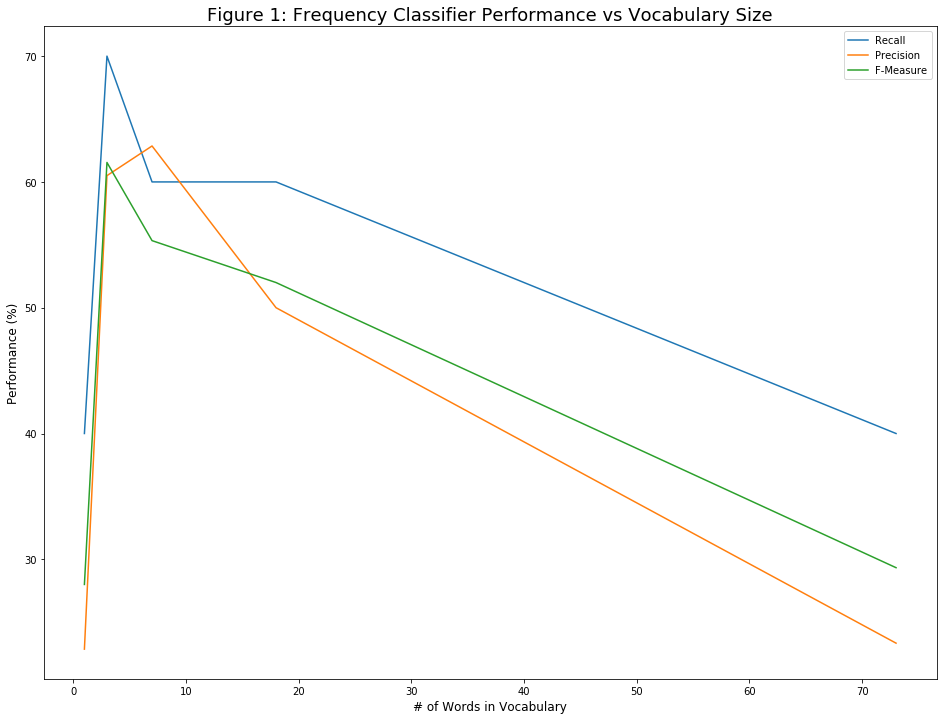

In [29]:
#Graph 1: Frequency Classifier Performance vs Vocabulary Size
#-Defining figure size
plt.figure(figsize = (16,12))

#-Data
plt.plot(ScoresFrequency['Vocabulary Length'],ScoresFrequency['Recall'])
plt.plot(ScoresFrequency['Vocabulary Length'],ScoresFrequency['Precision'])
plt.plot(ScoresFrequency['Vocabulary Length'],ScoresFrequency['F-Measure'])

#-Customization of our graph
plt.legend(['Recall', 'Precision', 'F-Measure'])
plt.xlabel('# of Words in Vocabulary', fontsize = 12)
plt.ylabel('Performance (%)', fontsize = 12)
plt.title('Figure 1: Frequency Classifier Performance vs Vocabulary Size', fontsize = 18)
#Displaying Plot
plt.show()


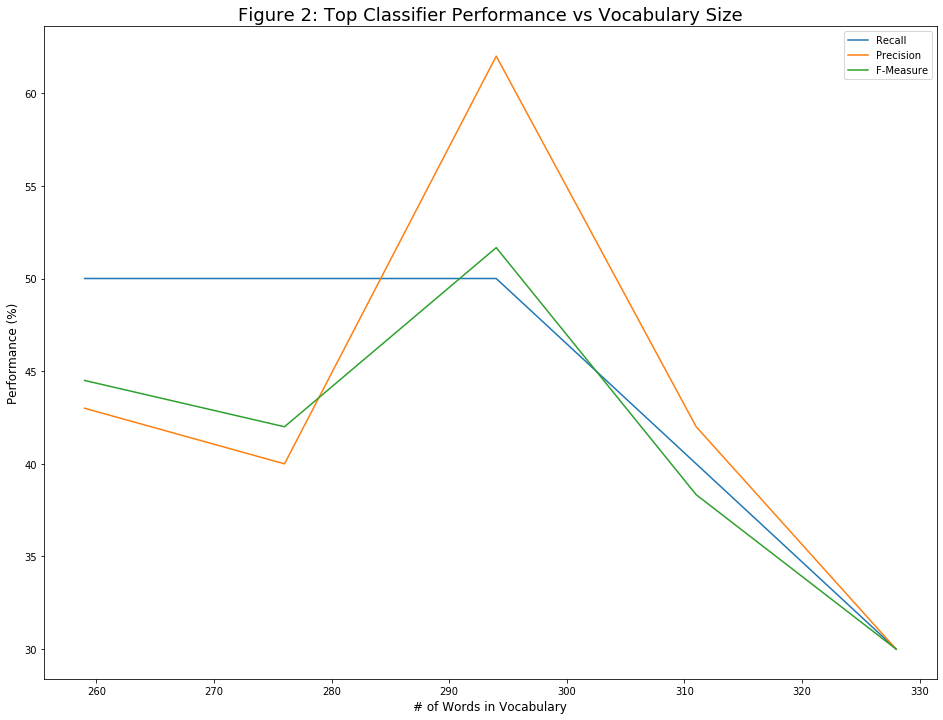

In [30]:
#Graph 2: Frequency Classifier Performance vs Vocabulary Size
#-Defining figure size
plt.figure(figsize = (16,12))

#-Data
plt.plot(ScoresTop['Vocabulary Length'],ScoresTop['Recall'])
plt.plot(ScoresTop['Vocabulary Length'],ScoresTop['Precision'])
plt.plot(ScoresTop['Vocabulary Length'],ScoresTop['F-Measure'])

#-Customization of our graph
plt.legend(['Recall', 'Precision', 'F-Measure'])
plt.xlabel('# of Words in Vocabulary', fontsize = 12)
plt.ylabel('Performance (%)', fontsize = 12)
plt.title('Figure 2: Top Classifier Performance vs Vocabulary Size', fontsize = 18)
#Displaying Plot
plt.show()


In [31]:
ScoresTop

,Recall,Precision,F-Measure,Vocabulary Length
0,30.0,30.0,30.000000,328
1,40.0,42.0,38.333333,311
2,50.0,62.0,51.666667,294
3,50.0,40.0,42.000000,276
4,50.0,43.0,44.500000,259
